In [1]:
import numpy as np

In [2]:
from definitions import (
    synthetic_data_generation, 
    plot_synthetic_ages, 
    exponential_function, 
    normalize_vector, 
    plot_kde,
    calculate_mswd
    )

In [3]:
# This script loads the stored variables from a .npz file, which will be used to generate synthetic U–Th ages and their uncertainties.

# data_dict: dictionary containing distributions

# The following parameters descibe how the U–Th age uncertainties behave with age:
#   popt           : best-fit parameters [a, b] of the exponential function
#                    uncer(age) = a * exp(b * age), describing how U–Th age uncertainty grows with age.
#   x_fit_norm     : x-axis values spanning the range of normalized residuals,
#                    used for plotting the fitted normal distribution of residuals.
#   y_fit_norm     : probability density values of the fitted normal distribution
#                    evaluated at x_fit_norm, representing the statistical spread of residuals.
#   sigma_fit_norm : standard deviation of the normalized residuals distribution,
#                    quantifies how much the U–Th age uncertainties scatter around the exponential fit.

data = np.load("stored_variables.npz", allow_pickle=True)
loaded = {key: data[key] for key in data.files}
for key, val in loaded.items():
    if isinstance(val, np.ndarray) and val.dtype == object and val.size == 1:
        loaded[key] = val.item()

data_dict = loaded["data_dict"]             # 'dict'
popt = loaded["popt"]                       # 'numpy.ndarray', shape=(2,)
x_fit_norm = loaded["x_fit_norm"]           # 'numpy.ndarray', shape=(1000,)
y_fit_norm = loaded["y_fit_norm"]           # 'numpy.ndarray', shape=(1000,)
sigma_fit_norm = loaded["sigma_fit_norm"]   # 'numpy.ndarray', shape=()

x_fit = loaded["x_fit"]                     # 'numpy.ndarray', shape=(1000,)
y_fit = loaded["y_fit"]                     # 'numpy.ndarray', shape=(1000,)

In [4]:
# Generate synthetic data
#Input parameters:
    # num_zirc: number of zircon ages to generate
    # eruption: synthetic eruption age
    # saturation: synthetic saturation age
    # dist: distribution from which the synthetic zircon ages are generated, string, must be one of the keys in data_dict
    # x_fit_norm: x-values (residual range) used to evaluate the fitted normal distribution of residuals
    # y_fit_norm: probability density values of the fitted normal distribution at x_fit_norm
    # sigma_fit_norm: standard deviation of the fitted normal distribution of residuals (spread around exponential fit)
    # popt: array containing the best-fit parameters [a, b] of the exponential function uncer = a * exp(b * age)
    # data_dict: dictionary containing the available distributions and their parameters

data_zrc_synthetic = synthetic_data_generation(200,10,30,'UniformDistribution',x_fit_norm,y_fit_norm,sigma_fit_norm,popt,data_dict) 

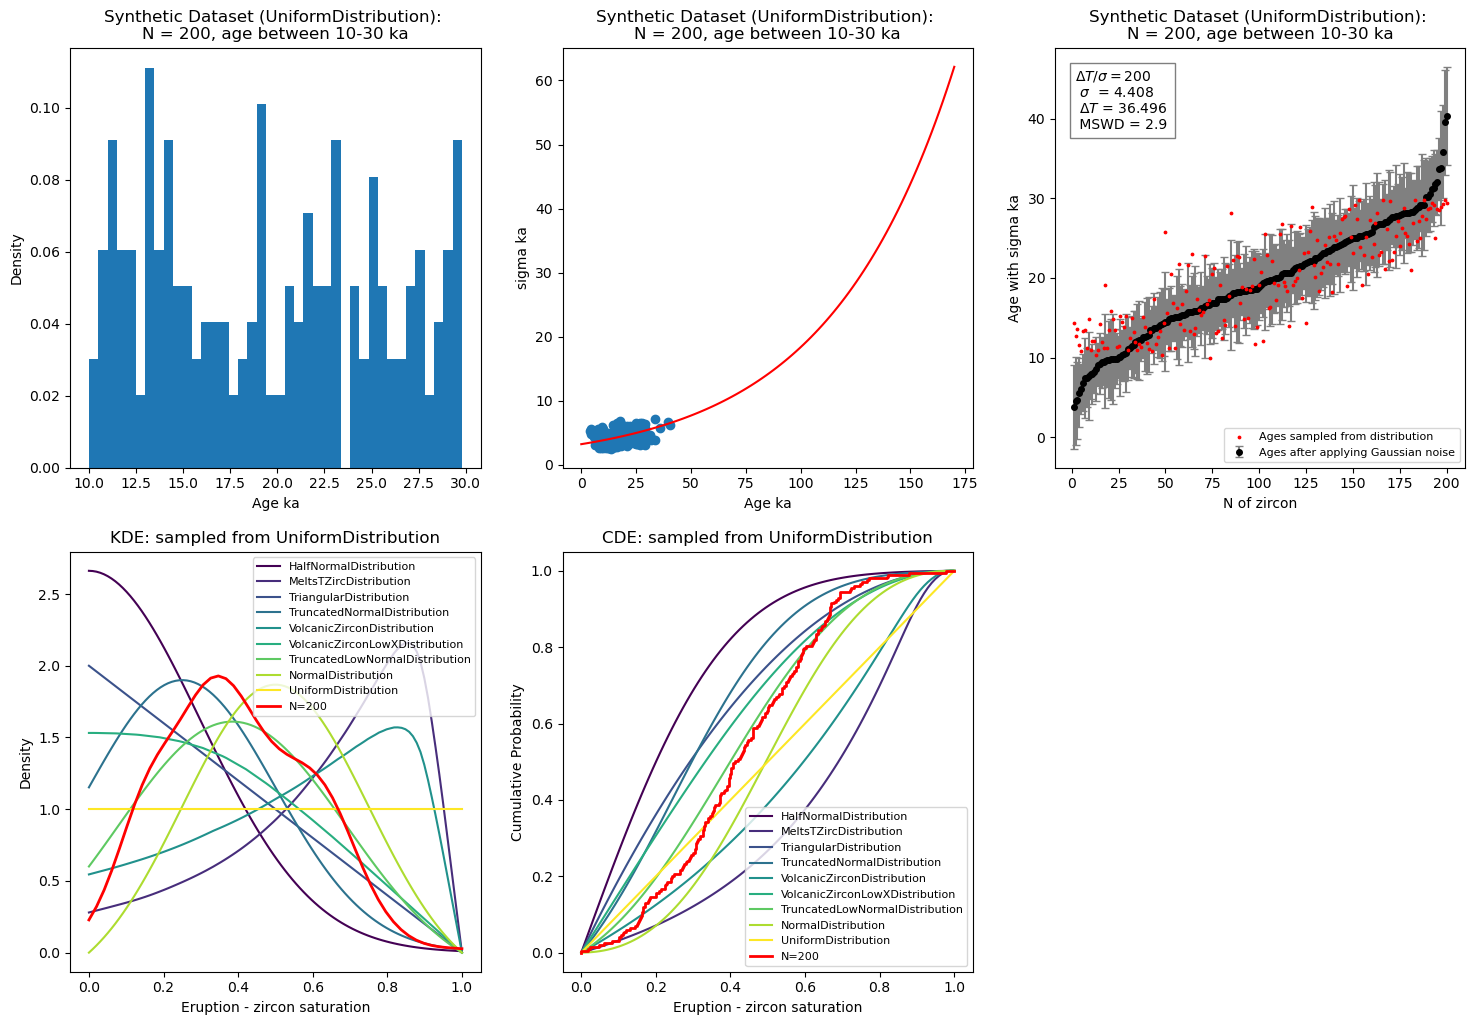

In [5]:
fig = plot_synthetic_ages(data_zrc_synthetic,data_dict,popt)
fig